## Final Project Submission

Please fill out:
* Student name: Deepali Sharma 
* Student pace: self paced / part time / full time:   Part time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:



### Business Understanding

The goal of Phase 2 project is to model data using regression techniques and come up with some business
recommendataions. The data consists of house sales data of Kings County during 2014 and 2015. After looking into data, I was intrigued to find out how the age of house and features such as waterfront and view impact the price of house. I therefore looked at the effect of these variables and certain other parameters such as condition, bedrooms etc to see if these make an improvement in my model outcome. Alternatively, one could state that does including these varaibles in regression model minimizes the difference in predicted sale value and actual values, and thus provide advice as to what features will help sellers to raise their house value.

Specifically I an define the following problem for a real estate agency(or a homeowner who wants to sell his house)interested in investing into houses

**What kind of houses the agency should invest in to maximize profits**


### Methodolgy

The main steps of the analysis are highlighed below:
* 1) Data Cleaning:
     * Replaced  basement sq_footage values that were "?" and  NAN with 0 
     * Replaced NAN for waterfront with NO
     * Replaced NAN for view with UNKNOWN
     * Define "age" variable for house and also a "grade_val" which is numeric only value for grade value of house
* 2 ) Looked at he correlation heat-map to find out the most correlated feature     
* 3) Built a baseline model using most correlated feature "sqft_living_log". However since the distributions didnt look normal, performed Log transformation on numeric and hot encoders for categorical
   variables
* 4) Another Baseline model with Log variables was built using most_correlated_feature="sqft_living_log"
* 5) Added categorical features in the second model and then more variables successive steps
* 6) based on the correlation heatmap, I dropped one of the variables which had correlations above or 0.7
* 7) the baseline model score was ~0.46 and final model score was ~0.62. Is this what is expected from this dataset with the best linear regression model fit? Do I need to look into Poly regression?
* 8) Linear model regression for no-log transformation scenario was around the same ballpark, but the qq plot was much worse.

### Regression Results

Linear Model (R-squared Score):
   * Baseline Model (most correlated feature): Both train and test scores were around 0.50
   * Final Model: Both train and test scores were around 0.60

Log-transformed Model (R-squared Score)
   * Baseline Model (most correlated feature): Both train and test scores were around 0.45
   * Final Model: Both train and test scores were around 0.54
 
Even though R-scores are higher for non-log transformed data, we can clearly see in the qq plots below that linear Regression assumptions are violated and as such we can not rely on that model. Model with Log-tranformation has a much better qq plot distribution making us feel more comfortable about it. Looking at residual plots again confirms this as one can see homoscadesity in log-transformed data whereas non-log transformed data deviated from it.


### Final Recommendations

We see that living square footage is very strongly correlated to house price, and also that houses which have higher grade quality, meaning the construction standards get sold for higher prices. But looking at the distributions of grade values, we see that most of the houses that get sold are grades 7 and 8. Looking at the distribution of square footage vs grades, we can see that there are many houses in grades 5 and 6 that have same square footage as the houses in grades 7 and 8.
I would therefore recommend that renovating houses in grades 5 and 6 with similar square footage as grades 7 and 8 would be profitable for real estate firm looking to invest.

## Start of the analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#pd.set_option('display.max_rows', 10)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Cleaning

In [3]:
#check for the NA values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Define variable "age" corresponding to age of house

In [4]:
from datetime import date
from datetime import datetime
df['date']=pd.to_datetime(df['date'])
df['yr_sold']=df['date'].dt.year.astype('int')
df['age'] =df['yr_sold']-df['yr_built']
df[['date','yr_built','yr_sold','age']]

,date,yr_built,yr_sold,age
0,2014-10-13,1955,2014,59
1,2014-12-09,1951,2014,63
2,2015-02-25,1933,2015,82
3,2014-12-09,1965,2014,49
4,2015-02-18,1987,2015,28
...,...,...,...,...
21592,2014-05-21,2009,2014,5
21593,2015-02-23,2014,2015,1
21594,2014-06-23,2009,2014,5
21595,2015-01-16,2004,2015,11


Introduce numeric "grade_val" variable which is same as grade with string part removed

In [5]:
df['grade_val']=df['grade'].str.split(" ", n = 1, expand = True)[0]
df['grade_val']=df['grade_val'].astype(str).astype(int)

Look at heatmap plot for correlation to find out most correlated varaible with price

In [6]:
heatmap_data=df.drop("id",axis=1)
heatmap_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,age,grade_val
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59,7
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,7
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,82,6
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,7
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,...,2009,0.0,98103,47.6993,-122.346,1530,1509,2014,5,8
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,...,2014,0.0,98146,47.5107,-122.362,1830,7200,2015,1,8
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,...,2009,0.0,98144,47.5944,-122.299,1020,2007,2014,5,7
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,...,2004,0.0,98027,47.5345,-122.069,1410,1287,2015,11,8


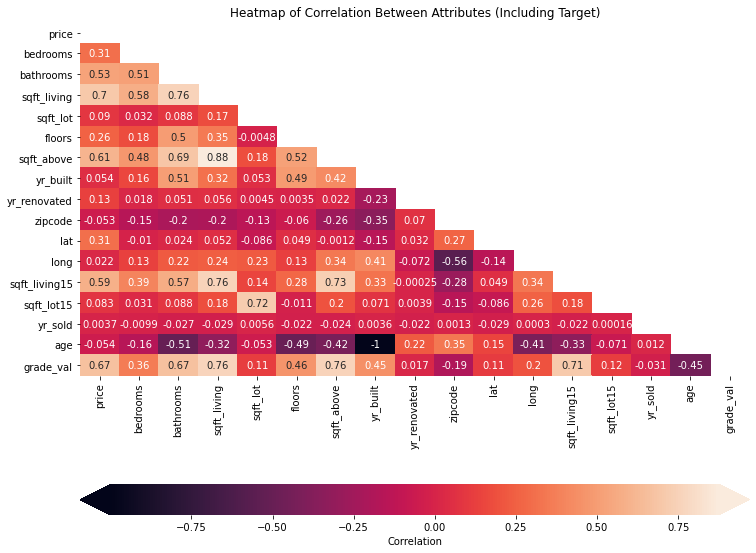

In [8]:
import seaborn as sns
#sns.set_style("whitegrid")
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
#heatmap_data = df[features_numeric]
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Based on the heatmap I see following facts:
* the most correalated feature with price is "sqft_living". This will be my most correlated feature and will be the variable for the baseline model. 
* "sqft_living15" and "sqft_lot15" are strongly correlated with "sqft_living" and "sqft_lot" respectively. So I   will drop "sqft_living15" and "sqft_lot15 from the list of my variables that go into model
* yr_built and age are perfectly correlared as is obvious. I will use only "age"
* sqft_above and sqft_living are correlated, so will drop "sqft_above"
* "grad_val" is  as they are strongly correlated with sqft_living and many othr featuresas can be seen above. Therefore I will drop grade_val and grade as well (since grade_val is essentially grade)    

Lets look at data nd find the vars with null values 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [10]:
#df[df["sqft_basement"]=='?']
df['sqft_basement'].replace(to_replace=['?'], value='-999',inplace=True)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])
df['sqft_basement'].value_counts()

 0.0       12826
-999.0       454
 600.0       217
 500.0       209
 700.0       208
           ...  
 266.0         1
 1930.0        1
 588.0         1
 1920.0        1
 65.0          1
Name: sqft_basement, Length: 304, dtype: int64

Since we cant do log for zeroes and negative values, I will replace 0.0 with 1.0 and -999 with 2. Their logs will be insignificant

In [11]:
df['sqft_basement'].replace(to_replace=0.0, value=1,inplace=True)
df['sqft_basement'].replace(to_replace=-999, value=2,inplace=True)
df['yr_renovated'].replace(to_replace=0.0, value=1,inplace=True)
df['yr_renovated']=df['yr_renovated'].fillna(2)
df['age'].replace(to_replace=0, value=0.01,inplace=True)
df['age'].replace(to_replace=-1, value=0.001,inplace=True)
#df['age'].value_counts()

In [12]:
#(df['yr_renovated']==0).sum()
df['yr_renovated'].value_counts()

1.0       17011
2.0        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64

In [13]:
df['age'].value_counts()

9.000      472
8.000      443
11.000     431
0.010      430
10.000     428
          ... 
113.000     28
115.000     26
81.000      23
80.000      21
0.001       12
Name: age, Length: 117, dtype: int64

In [14]:
df['waterfront']  = df['waterfront'].fillna('NO')
df["view"]        = df["view"].fillna('UNKNOWN')

In [15]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
yr_sold          0
age              0
grade_val        0
dtype: int64

Lets divide the features into numeric and categorical, and look at their distributions to see if theys satisfy normality criteria required for linear regression

In [16]:
features_numeric     = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',\
                        'sqft_basement','yr_renovated','zipcode',\
                        'yr_sold','age','grade_val']
features_categorical = ['waterfront','view','condition','grade']
features =   ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',\
              'sqft_basement','yr_renovated','zipcode','yr_sold','age','grade_val',\
              'waterfront','view','condition']

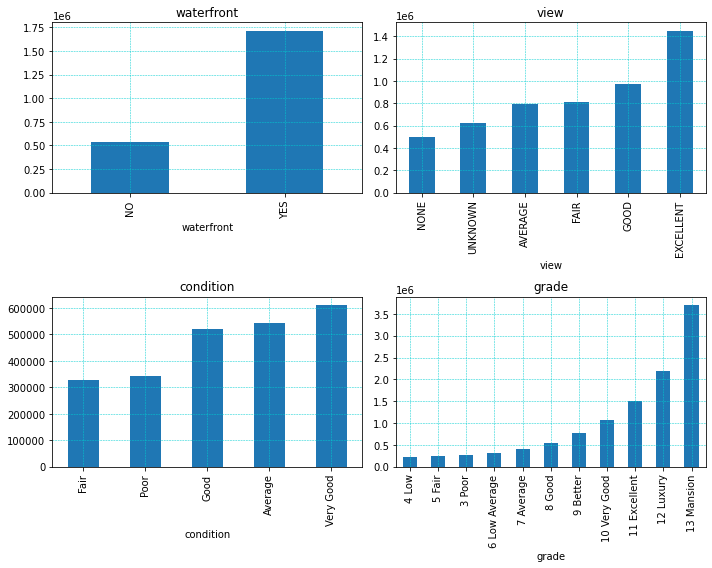

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8),constrained_layout=True)

for col, ax in zip(features_categorical, axes.flatten()):
    (df.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)              # Make the title the name of the column
    ax.grid(True, color = 'DarkTurquoise', alpha=1, linestyle = '--', linewidth = 0.5)
    
fig.tight_layout()

We will not use grade as its highly correlated with other variables. waterfront is a binary variable, so I would use binary encoder from sci-kit learn and one hot encoders for view and condition
However grade is very important precisely because it is highly correlated with square footage and this is important as this can help us with some recommendations

Also we will look at individual distributions of variables themselves, and scatter plot w.r.t. price

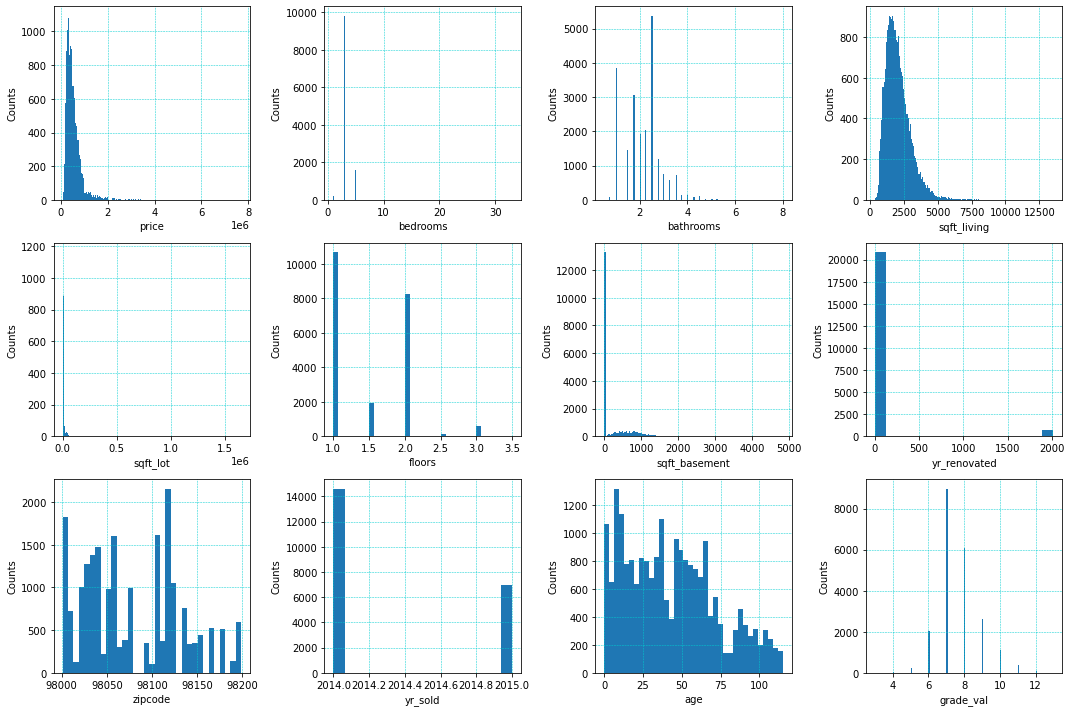

In [18]:
analyze_data=df[features_numeric]
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(15, 10))
fig.set_tight_layout(True)

for index, col in enumerate(analyze_data.columns):
    ax = axes[index//4][index%4]
    ax.hist(analyze_data[col],bins='auto')
    #sns.histplot(analyze_data[col])
    ax.set_xlabel(col)
    ax.set_ylabel("Counts")
    ax.grid(True, color = 'DarkTurquoise', alpha=1, linestyle = '--', linewidth = 0.5)
#plt.legend()
plt.show()

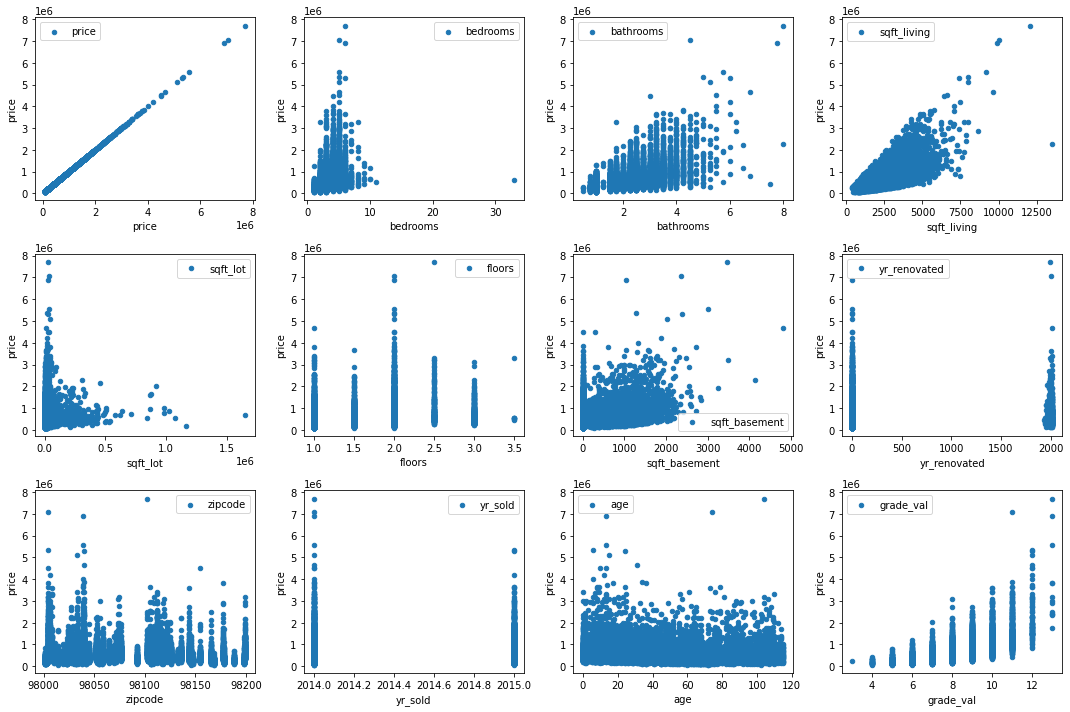

In [19]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(15, 10))
fig.set_tight_layout(True)

for idx, col in enumerate(analyze_data.columns):
    analyze_data.plot(kind='scatter', x=col, y='price', ax=axes[idx//4][idx%4], label=col)
    #ax = axes[idx//4][idx%4]
    #ax.scatter(x=col, y='price')
    #ax.set_xlabel(col)
    ax.grid(True, color = 'DarkTurquoise', alpha=1, linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

Lets look at linear model first for the most correlated feature so that we can compare the results later with log model.

In [20]:
linear_data=df[features_numeric]

In [21]:
Xl = linear_data.drop(columns='price')
yl = df['price']

Xl_train , Xl_test, yl_train, yl_test = train_test_split(Xl,yl,random_state=42, test_size=0.25)

In [22]:
most_correlated_lin_feature = 'sqft_living'

In [23]:
baseline_lin_model = LinearRegression()

In [24]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_lin_scores = cross_validate(
    estimator=baseline_lin_model,
    X=Xl_train[[most_correlated_lin_feature]],
    y=yl_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_lin_scores["train_score"].mean())
print("Validation score:", baseline_lin_scores["test_score"].mean())

Train score:      0.4895269677689762
Validation score: 0.4935530672243642


Lets prepare the data for log transformations

In [25]:
log_data=df[features_numeric]
log_names = [f'{column}_log' for column in log_data.columns]

log_data = np.log(df[features_numeric])
log_data.columns = log_names


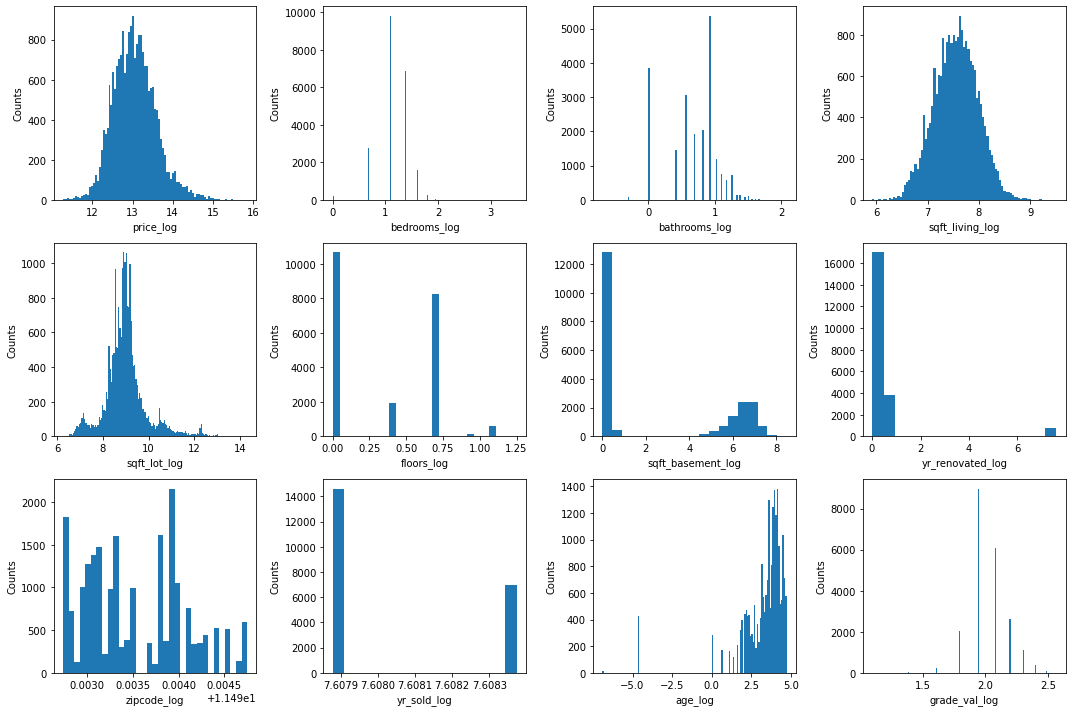

In [26]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(15, 10))
fig.set_tight_layout(True)

for index, col in enumerate(log_data.columns):
    ax = axes[index//4][index%4]
    ax.hist(log_data[col], bins='auto')
    ax.set_xlabel(col)
    ax.set_ylabel("Counts")

As expected the log-transformed data looks better normally distributed!

For completeness lets look at the scatter plots as well

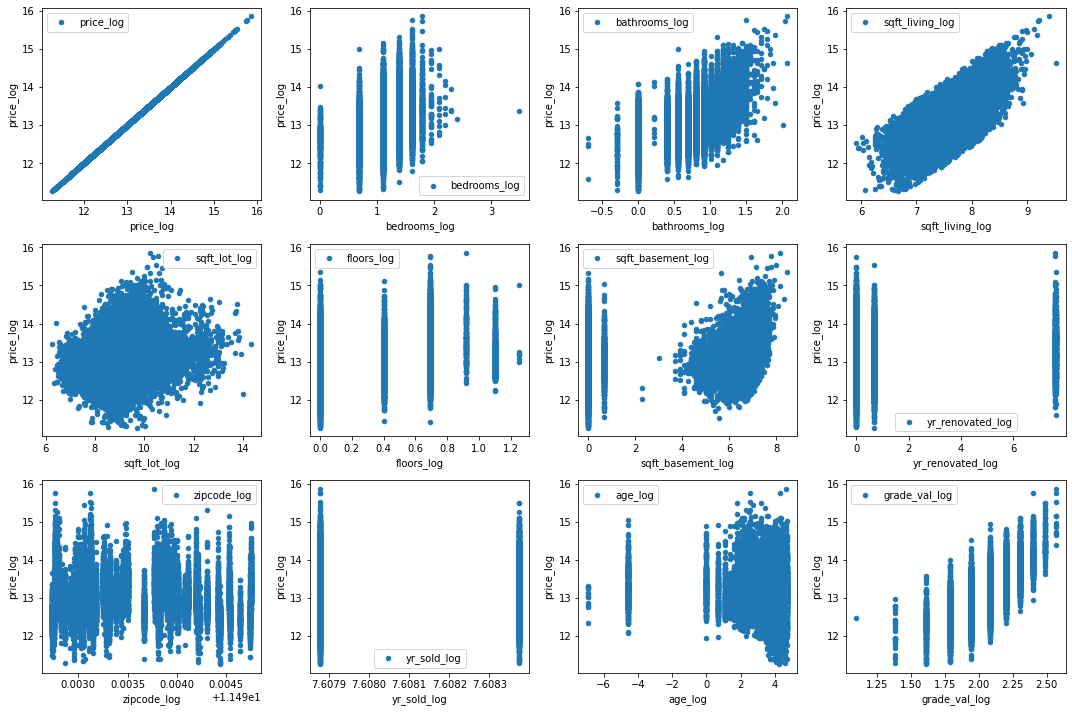

In [28]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(15, 10))
fig.set_tight_layout(True)

for idx, col in enumerate(log_data.columns):
    log_data.plot(kind='scatter', x=col, y='price_log', ax=axes[idx//4][idx%4], label=col)
plt.legend()
plt.show()

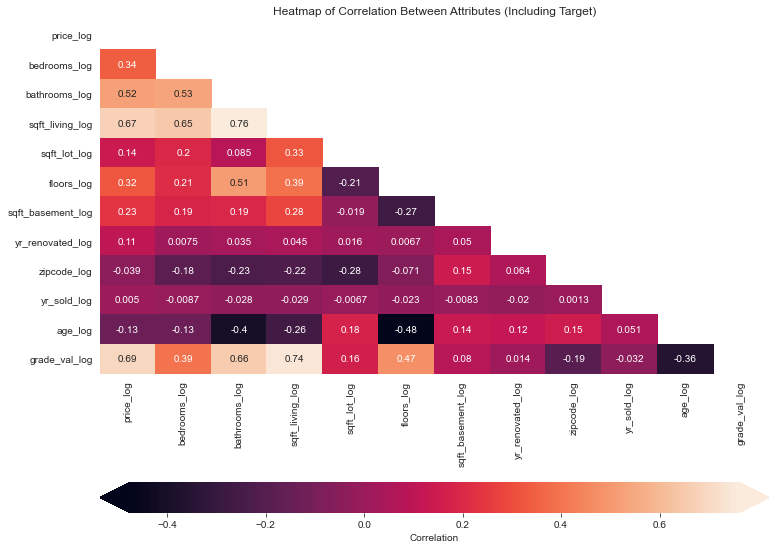

In [30]:
sns.set_style("whitegrid")
heatmap=log_data

corr = heatmap.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [31]:
most_correlated_feature = 'sqft_living_log'

In [32]:
X_categorical=df[['waterfront','view','condition']]

Lets prepare the categorical variables for regression. Sice waterfront is binary, we will use ordinal encoder and for others we will use one hot encoders

In [33]:
from sklearn.preprocessing import OrdinalEncoder

# (1) Create a variable street_train that contains the
# relevant column from X_train
# (Use double brackets [[]] to get the appropriate shape)
waterfront_train = X_categorical[["waterfront"]]

# (2) Instantiate an OrdinalEncoder
encoder_waterfront = OrdinalEncoder()

# (3) Fit the encoder on street_train
encoder_waterfront.fit(waterfront_train)
#encoder_waterfront.fit_transform(waterfront_train.dropna().values.reshape(-1,1))

# Inspect the categories of the fitted encoder
encoder_waterfront.categories_[0]

array(['NO', 'YES'], dtype=object)

In [34]:
# (4) Transform frontage_missing_train using the encoder and
# assign the result to frontage_missing_encoded_train
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)

# Flatten for appropriate shape
waterfront_encoded_train = waterfront_encoded_train.flatten()

# Visually inspect frontage_missing_encoded_train
waterfront_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [35]:
X_categorical["waterfront"] = waterfront_encoded_train

In [36]:
from sklearn.preprocessing import OneHotEncoder

# (1) Create a variable view_train
view_train = X_categorical[["view"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(view_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE', 'UNKNOWN'],
       dtype=object)]

In [37]:
view_encoded_train = ohe.transform(view_train)

# Visually inspect fireplace_qu_encoded_train
view_encoded_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [38]:
# (5a) Make the transformed data into a dataframe
view_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    view_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_categorical.index
)

# Visually inspect new dataframe
view_encoded_train

,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,1.0,0.0
21593,0.0,0.0,0.0,0.0,1.0,0.0
21594,0.0,0.0,0.0,0.0,1.0,0.0
21595,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
X_categorical.drop("view", axis=1, inplace=True)
X_categorical = pd.concat([X_categorical, view_encoded_train], axis=1)
X_categorical

,waterfront,condition,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN
0,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,Very Good,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
21592,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
21593,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
21594,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
21595,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
condition_train = X_categorical[["condition"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe1 = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe1.fit(condition_train)

# Inspect the categories of the fitted encoder
ohe1.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [41]:
condition_encoded_train = ohe1.transform(condition_train)
condition_encoded_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [42]:
condition_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    condition_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe1.categories_[0],
    # Set the index to match X_train's index
    index=X_categorical.index
)

# Visually inspect new dataframe
condition_encoded_train

,Average,Fair,Good,Poor,Very Good
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
21592,1.0,0.0,0.0,0.0,0.0
21593,1.0,0.0,0.0,0.0,0.0
21594,1.0,0.0,0.0,0.0,0.0
21595,1.0,0.0,0.0,0.0,0.0


In [43]:
X_categorical.drop("condition", axis=1, inplace=True)
X_categorical = pd.concat([X_categorical, condition_encoded_train], axis=1)
X_categorical

,waterfront,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN,Average,Fair,Good,Poor,Very Good
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
preprocessed = pd.concat([log_data, X_categorical], axis=1)
preprocessed

,price_log,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,sqft_basement_log,yr_renovated_log,zipcode_log,yr_sold_log,...,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN,Average,Fair,Good,Poor,Very Good
0,12.309982,1.098612,0.000000,7.073270,8.639411,0.000000,0.000000,0.000000,11.494537,7.607878,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,13.195614,1.098612,0.810930,7.851661,8.887653,0.693147,5.991465,7.596392,11.493997,7.607878,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,12.100712,0.693147,0.000000,6.646391,9.210340,0.000000,0.000000,0.693147,11.493008,7.608374,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,13.311329,1.386294,1.098612,7.580700,8.517193,0.000000,6.813445,0.000000,11.494110,7.607878,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,13.142166,1.098612,0.693147,7.426549,8.997147,0.000000,0.000000,0.000000,11.493478,7.608374,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.793859,1.098612,0.916291,7.333023,7.030857,1.098612,0.000000,0.000000,11.493773,7.607878,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21593,12.899220,1.386294,0.916291,7.745003,8.667852,0.693147,0.000000,0.000000,11.494211,7.608374,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21594,12.904459,0.693147,-0.287682,6.927558,7.207860,0.693147,0.000000,0.000000,11.494191,7.607878,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21595,12.899220,1.098612,0.916291,7.377759,7.778211,0.693147,0.000000,0.000000,11.492998,7.608374,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [45]:
most_correlated_feature="sqft_living_log"

In [46]:
X = preprocessed.drop(columns='price_log')
y = preprocessed['price_log']

X_train , X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.25)

In [47]:
baseline_model = LinearRegression()

In [48]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.45343610831579406
Validation score: 0.4595230000848154


In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms_log       16197 non-null  float64
 1   bathrooms_log      16197 non-null  float64
 2   sqft_living_log    16197 non-null  float64
 3   sqft_lot_log       16197 non-null  float64
 4   floors_log         16197 non-null  float64
 5   sqft_basement_log  16197 non-null  float64
 6   yr_renovated_log   16197 non-null  float64
 7   zipcode_log        16197 non-null  float64
 8   yr_sold_log        16197 non-null  float64
 9   age_log            16197 non-null  float64
 10  grade_val_log      16197 non-null  float64
 11  waterfront         16197 non-null  float64
 12  AVERAGE            16197 non-null  float64
 13  EXCELLENT          16197 non-null  float64
 14  FAIR               16197 non-null  float64
 15  GOOD               16197 non-null  float64
 16  NONE               

For second model, lets add categorical features and see how the regression score improves (adding waterfront and view first)

In [50]:
#features=['sqft_living','bedrooms','bathrooms','sqft_lot','floors',\
#              'sqft_basement','yr_renovated','zipcode','yr_sold','age','grade_val',\
#              'waterfront','view','condition']
features_2=['sqft_living_log','waterfront','AVERAGE','EXCELLENT','FAIR','GOOD','NONE','UNKNOWN']
X_train_second_model = X_train[features_2]

In [51]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.49348433990430735
Validation score: 0.49596841816417925

Baseline Model
Train score:      0.45343610831579406
Validation score: 0.4595230000848154


In [52]:
features_3=['sqft_living_log','waterfront','AVERAGE','EXCELLENT','FAIR','GOOD','NONE','UNKNOWN',\
           'Average','Fair','Good','Poor','Very Good']
X_train_third_model = X_train[features_3]

In [53]:
third_model = LinearRegression()

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.49917707885863544
Validation score: 0.5025372733786906

Second Model
Train score:      0.49348433990430735
Validation score: 0.49596841816417925

Baseline Model
Train score:      0.45343610831579406
Validation score: 0.4595230000848154


In [54]:
features_4=['sqft_living_log','waterfront','AVERAGE','EXCELLENT','FAIR','GOOD','NONE','UNKNOWN',\
           'Average','Fair','Good','Poor','Very Good','bedrooms_log','floors_log',\
            'sqft_basement_log','yr_renovated_log','yr_sold_log','age_log']
X_train_fourth_model = X_train[features_4]

In [55]:
fourth_model = LinearRegression()

fourth_model_scores = cross_validate(
    estimator=fourth_model,
    X=X_train_fourth_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print("Current Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()
print("Third Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.5283889202039348
Validation score: 0.5309211098064465

Third Model
Train score:      0.49917707885863544
Validation score: 0.5025372733786906

Second Model
Train score:      0.49348433990430735
Validation score: 0.49596841816417925

Baseline Model
Train score:      0.45343610831579406
Validation score: 0.4595230000848154


In [145]:
#features_5=['sqft_living_log','waterfront','AVERAGE','EXCELLENT','FAIR','GOOD','NONE','UNKNOWN',\
#           'Average','Fair','Good','Poor','Very Good','bedrooms_log','bathrooms_log','floors_log',\
#            'sqft_basement_log','yr_renovated_log','yr_sold_log','age_log','grade_val_log',
#            'sqft_lot_log','zipcode_log'
#           ]
features_5=['sqft_living_log','waterfront','AVERAGE','EXCELLENT','FAIR','GOOD','NONE','UNKNOWN',\
           'Average','Fair','Good','Poor','Very Good','bedrooms_log','floors_log',\
            'sqft_basement_log','yr_sold_log','age_log','grade_val_log',\
            'sqft_lot_log','yr_renovated_log','zipcode_log'\
           ]
X_train_fifth_model = X_train[features_5]

In [146]:
fifth_model = LinearRegression()

fifth_model_scores = cross_validate(
    estimator=fifth_model,
    X=X_train_fifth_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print("Current Model")
print("Train score:     ", fifth_model_scores["train_score"].mean())
print("Validation score:", fifth_model_scores["test_score"].mean())
print()
print("Fourth Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()
print("Third Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6129731623275735
Validation score: 0.6153407368677964

Fourth Model
Train score:      0.5283889202039348
Validation score: 0.5309211098064465

Third Model
Train score:      0.49917707885863544
Validation score: 0.5025372733786906

Second Model
Train score:      0.49348433990430735
Validation score: 0.49596841816417925

Baseline Model
Train score:      0.45343610831579406
Validation score: 0.4595230000848154


In [147]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms_log: True
bathrooms_log: True
sqft_living_log: True
sqft_lot_log: True
floors_log: True
sqft_basement_log: True
yr_renovated_log: True
zipcode_log: True
yr_sold_log: True
age_log: True
grade_val_log: True
waterfront: True
AVERAGE: True
EXCELLENT: True
FAIR: True
GOOD: True
NONE: True
UNKNOWN: True
Average: True
Fair: True
Good: True
Poor: True
Very Good: True


In [115]:
X_train.describe()

,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,sqft_basement_log,yr_renovated_log,zipcode_log,yr_sold_log,age_log,...,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN,Average,Fair,Good,Poor,Very Good
count,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,...,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000
mean,1.177621,0.677960,7.552376,8.990360,0.338810,2.508355,0.379839,11.493519,7.608038,3.303945,...,0.015126,0.015126,0.023338,0.900475,0.003025,0.649812,0.007964,0.261653,0.001111,0.079459
std,0.283701,0.392438,0.424240,0.904018,0.352543,3.152423,1.375282,0.000545,0.000232,1.475198,...,0.122059,0.122059,0.150978,0.299374,0.054921,0.477044,0.088890,0.439548,0.033319,0.270462
min,0.000000,-0.693147,5.913503,6.253829,0.000000,0.000000,0.000000,11.492733,7.607878,-6.907755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.098612,0.559616,7.265430,8.528726,0.000000,0.000000,0.000000,11.493059,7.607878,2.890372,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.098612,0.810930,7.555905,8.938532,0.405465,0.000000,0.000000,11.493386,7.607878,3.688879,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.386294,0.916291,7.847763,9.279866,0.693147,6.309918,0.000000,11.493916,7.608374,4.143135,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2.397895,2.079442,9.513404,14.317109,1.252763,8.480529,7.608374,11.494751,7.608374,4.744932,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
X_train_fifth_model.describe()

,sqft_living_log,waterfront,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN,Average,Fair,...,Very Good,bedrooms_log,floors_log,sqft_basement_log,yr_sold_log,age_log,grade_val_log,sqft_lot_log,yr_renovated_log,zipcode_log
count,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,...,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000
mean,7.552376,0.006853,0.042909,0.015126,0.015126,0.023338,0.900475,0.003025,0.649812,0.007964,...,0.079459,1.177621,0.338810,2.508355,7.608038,3.303945,2.024634,8.990360,0.379839,11.493519
std,0.424240,0.082502,0.202659,0.122059,0.122059,0.150978,0.299374,0.054921,0.477044,0.088890,...,0.270462,0.283701,0.352543,3.152423,0.000232,1.475198,0.148843,0.904018,1.375282,0.000545
min,5.913503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.607878,-6.907755,1.098612,6.253829,0.000000,11.492733
25%,7.265430,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.098612,0.000000,0.000000,7.607878,2.890372,1.945910,8.528726,0.000000,11.493059
50%,7.555905,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.098612,0.405465,0.000000,7.607878,3.688879,1.945910,8.938532,0.000000,11.493386
75%,7.847763,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.386294,0.693147,6.309918,7.608374,4.143135,2.079442,9.279866,0.000000,11.493916
max,9.513404,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.397895,1.252763,8.480529,7.608374,4.744932,2.564949,14.317109,7.608374,11.494751


In [117]:
y_test

3686     11.794338
10247    12.936034
4037     13.110291
3437     12.779873
19291    13.314635
           ...    
18276    12.891692
15003    13.329378
13478    14.100690
18399    13.572802
2358     12.363076
Name: price_log, Length: 5400, dtype: float64

In [118]:
X_test

,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,sqft_basement_log,yr_renovated_log,zipcode_log,yr_sold_log,age_log,...,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN,Average,Fair,Good,Poor,Very Good
3686,1.098612,-0.287682,6.745236,9.056373,0.000000,5.521461,0.000000,11.494211,7.608374,4.248495,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
10247,1.098612,0.000000,7.319865,8.713253,0.000000,6.476972,0.000000,11.493896,7.607878,4.304065,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4037,1.386294,0.810930,7.489971,10.645425,0.000000,6.429719,0.000000,11.493182,7.608374,3.465736,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3437,0.693147,0.405465,7.038784,7.824046,0.000000,6.234411,0.693147,11.493804,7.608374,3.295837,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19291,1.098612,0.000000,7.313220,8.273847,0.000000,6.214608,0.000000,11.493814,7.607878,4.204693,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18276,1.609438,0.000000,7.064759,8.818334,0.000000,5.913503,0.000000,11.493997,7.607878,4.248495,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
15003,1.098612,0.559616,7.420579,8.536996,0.000000,6.522093,0.000000,11.494191,7.608374,4.110874,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13478,1.386294,0.810930,8.089482,8.442470,0.693147,6.802395,0.000000,11.493865,7.608374,4.682131,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
18399,1.386294,1.609438,8.669056,9.540076,0.693147,7.635304,0.000000,11.493151,7.608374,3.091042,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [119]:
X_test_fifth_model = X_test[features_5]

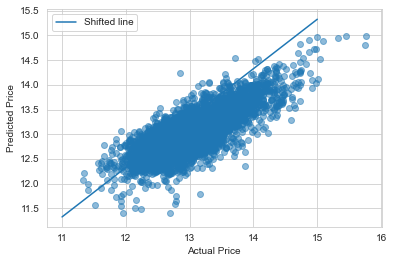

In [120]:
model = LinearRegression()
model.fit(X_train_fifth_model, y_train)

preds = model.predict(X_test_fifth_model)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
#perfect_line1 = np.reshape(perfect_line,(y_test.min(),y_test.max()))
#ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.plot(range(int(y_test.min()), int(y_test.min())+len(perfect_line)), perfect_line, label='Shifted line')
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

In [121]:
y_test.max()

15.769955609469426

In [122]:
preds

array([12.3387538 , 12.65185404, 12.76216845, ..., 13.86663911,
       14.14139868, 12.85712273])

In [123]:
perfect_line = np.arange(y_test.min(), y_test.max())
perfect_line

array([11.32659589, 12.32659589, 13.32659589, 14.32659589, 15.32659589])

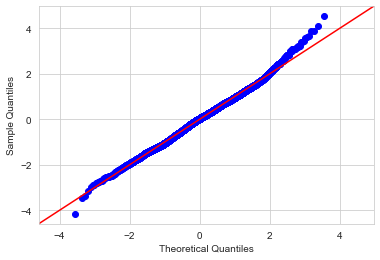

In [124]:
import scipy.stats as stats
import statsmodels.api as sm
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);
#ax.grid(True, color = 'DarkTurquoise', alpha=1, linestyle = '--', linewidth = 0.5)
plt.savefig('./figs/qqplot_logdata.png')

In [125]:
smodel=sm.OLS(y_train, sm.add_constant(X_train_fifth_model)).fit()
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     1285.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:51:02   Log-Likelihood:                -4915.7
No. Observations:               16197   AIC:                             9873.
Df Residuals:                   16176   BIC:                         1.003e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1026.9951     76.412    -13.440      0.000   -1176.771    -877.219
sqft_living_log       0.4834      0.013     36.489      0.000       0.457       0.509
waterfront            0.3932      0.038     10.325      0.000       0.319       0.468
AVERAGE            -171.1726     12.735    -13.441      0.000    -196.135    -146.210
EXCELLENT          -170.9975     12.736    -13.427      0.000    -195.961    -146.034
FAIR               -171.0996     12.735    -13.435      0.000    -196.063    -146.137
GOOD               -171.1190     12.735    -13.436      0.000    -196.082    -146.156
NONE               -171.2947     12.735    -13.451      0.000    -196.256    -146.334
UNKNOWN            -171.3116     12.736    -13.451      0.000    -196.275    -146.348
Average            -205.4460     15.283    -13.443      0.000    -235.401    -175.491
Fair               -205.4995     15.283    -13.446      0.000    -235.456    -175.543
Good               -205.3688     15.282    -13.439      0.000    -235.323    -175.414
Poor               -205.4333     15.283    -13.442      0.000    -235.389    -175.477
Very Good          -205.2475     15.282    -13.431      0.000    -235.202    -175.293
bedrooms_log         -0.1548      0.012    -12.627      0.000      -0.179      -0.131
floors_log            0.0722      0.011      6.715      0.000       0.051       0.093
sqft_basement_log     0.0085      0.001      8.130      0.000       0.006       0.011
yr_sold_log          85.5341     11.163      7.662      0.000      63.653     107.415
age_log               0.0327      0.002     15.128      0.000       0.029       0.037
grade_val_log         1.6062      0.028     56.947      0.000       1.551       1.662
sqft_lot_log         -0.0338      0.004     -9.216      0.000      -0.041      -0.027
yr_renovated_log      0.0220      0.002     11.452      0.000       0.018       0.026
zipcode_log          66.0724      5.216     12.668      0.000      55.849      76.296
==============================================================================
Omnibus:                       43.088   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.006
Skew:                           0.105   Prob(JB):                     1.69e-10
Kurtosis:                       3.150   Cond. No.                     5.37e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [126]:
final_model=LinearRegression()

In [127]:
final_model.fit(X_train_fifth_model,y_train)

final_model.score(X_test_fifth_model, y_test)

0.5978872185115882

In [128]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test_fifth_model), squared=False)

0.3322802935693793

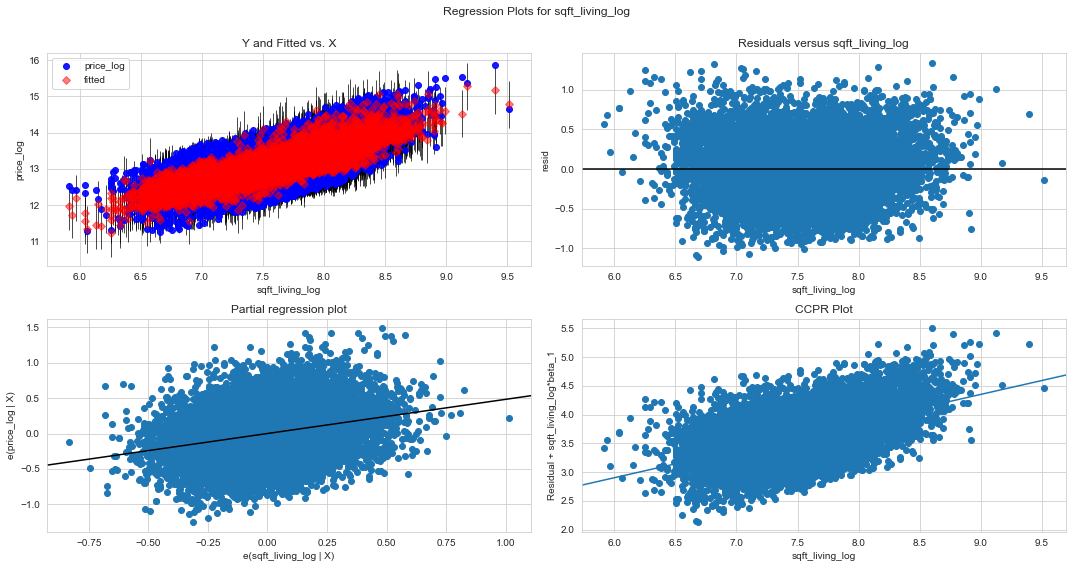

In [129]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(smodel, 'sqft_living_log', fig=fig)
plt.show()

Lets look at the linear model for the same set of final variables and qq plot as well and see how it compares to log model results

In [74]:
linear_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   sqft_basement  21597 non-null  float64
 7   yr_renovated   21597 non-null  float64
 8   zipcode        21597 non-null  int64  
 9   yr_sold        21597 non-null  int64  
 10  age            21597 non-null  float64
 11  grade_val      21597 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 2.0 MB


In [75]:
preprocessed_linear = pd.concat([linear_data, X_categorical], axis=1)
preprocessed_linear

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_renovated,zipcode,yr_sold,...,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN,Average,Fair,Good,Poor,Very Good
0,221900.0,3,1.00,1180,5650,1.0,1.0,1.0,98178,2014,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,7242,2.0,400.0,1991.0,98125,2014,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,770,10000,1.0,1.0,2.0,98028,2015,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,5000,1.0,910.0,1.0,98136,2014,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,510000.0,3,2.00,1680,8080,1.0,1.0,1.0,98074,2015,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1.0,1.0,98103,2014,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21593,400000.0,4,2.50,2310,5813,2.0,1.0,1.0,98146,2015,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21594,402101.0,2,0.75,1020,1350,2.0,1.0,1.0,98144,2014,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21595,400000.0,3,2.50,1600,2388,2.0,1.0,1.0,98027,2015,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [133]:
Xl = preprocessed_linear.drop(columns='price')
yl = preprocessed_linear['price']

Xl_train , Xl_test, yl_train, yl_test = train_test_split(Xl,yl,random_state=42, test_size=0.25)

In [136]:
features_lin=['sqft_living','waterfront','AVERAGE','EXCELLENT','FAIR','GOOD','NONE','UNKNOWN',\
           'Average','Fair','Good','Poor','Very Good','bedrooms','floors','grade_val',\
            'sqft_basement','yr_sold','age','sqft_lot','yr_renovated','zipcode'\
           ]
X_train_linear = Xl_train[features_lin]

In [137]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
final_lin_model = LinearRegression()

final_lin_scores = cross_validate(
    estimator=final_lin_model,
    X=X_train_linear,
    y=yl_train,
    return_train_score=True,
    cv=splitter
)
print("Final Linear Scores")
print("Train score:     ", final_lin_scores["train_score"].mean())
print("Validation score:", final_lin_scores["test_score"].mean())
print("Baseline Linear Scores")
print("Train score:     ", baseline_lin_scores["train_score"].mean())
print("Validation score:", baseline_lin_scores["test_score"].mean())

Final Linear Scores
Train score:      0.6609386824040491
Validation score: 0.6530042643065572
Baseline Linear Scores
Train score:      0.4895269677689762
Validation score: 0.4935530672243642


In [138]:
linear_model = LinearRegression()
linear_model.fit(X_train_linear, yl_train)

LinearRegression()

In [139]:
X_test_linear=Xl_test[features_lin]

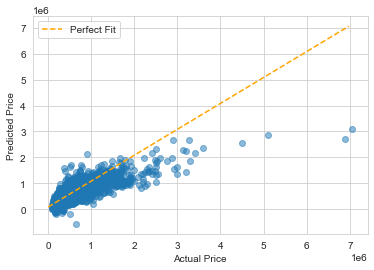

In [140]:
predsl = linear_model.predict(X_test_linear)
fig, ax = plt.subplots()

perfect_line = np.arange(yl_test.min(), yl_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(yl_test, predsl, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

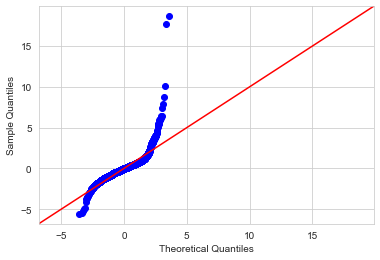

In [141]:
residualsL = (yl_test - predsl)
sm.graphics.qqplot(residualsL, dist=stats.norm, line='45', fit=True);
plt.savefig('./figs/qqplot_linear.png')
plt.show()

In [142]:
lmodel=sm.OLS(yl_train, sm.add_constant(X_train_linear)).fit()
lmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1566.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:57:19   Log-Likelihood:            -2.2177e+05
No. Observations:               16197   AIC:                         4.436e+05
Df Residuals:                   16176   BIC:                         4.437e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.427e+07   5.91e+06     -5.796      0.000   -4.59e+07   -2.27e+07
sqft_living     176.9487      3.833     46.166      0.000     169.436     184.462
waterfront       5.4e+05   2.48e+04     21.748      0.000    4.91e+05    5.89e+05
AVERAGE       -5.766e+06   9.85e+05     -5.851      0.000    -7.7e+06   -3.83e+06
EXCELLENT     -5.537e+06   9.86e+05     -5.616      0.000   -7.47e+06    -3.6e+06
FAIR          -5.694e+06   9.86e+05     -5.777      0.000   -7.63e+06   -3.76e+06
GOOD          -5.689e+06   9.86e+05     -5.772      0.000   -7.62e+06   -3.76e+06
NONE           -5.81e+06   9.85e+05     -5.898      0.000   -7.74e+06   -3.88e+06
UNKNOWN       -5.776e+06   9.86e+05     -5.857      0.000   -7.71e+06   -3.84e+06
Average       -6.869e+06   1.18e+06     -5.807      0.000   -9.19e+06   -4.55e+06
Fair          -6.871e+06   1.18e+06     -5.808      0.000   -9.19e+06   -4.55e+06
Good          -6.856e+06   1.18e+06     -5.797      0.000   -9.17e+06   -4.54e+06
Poor          -6.868e+06   1.18e+06     -5.805      0.000   -9.19e+06   -4.55e+06
Very Good     -6.808e+06   1.18e+06     -5.757      0.000   -9.13e+06   -4.49e+06
bedrooms      -3.497e+04   2372.861    -14.737      0.000   -3.96e+04   -3.03e+04
floors          4.44e+04   4184.724     10.609      0.000    3.62e+04    5.26e+04
grade_val      1.323e+05   2481.657     53.307      0.000    1.27e+05    1.37e+05
sqft_basement    23.2282      5.069      4.582      0.000      13.292      33.164
yr_sold        2.559e+04   3608.311      7.093      0.000    1.85e+04    3.27e+04
age            3358.5505     80.629     41.654      0.000    3200.508    3516.593
sqft_lot         -0.3040      0.043     -7.111      0.000      -0.388      -0.220
yr_renovated     14.7250      4.897      3.007      0.003       5.127      24.323
zipcode         -56.7356     35.536     -1.597      0.110    -126.391      12.920
==============================================================================
Omnibus:                    11494.279   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           631366.781
Skew:                           2.828   Prob(JB):                         0.00
Kurtosis:                      33.059   Cond. No.                     2.67e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.26e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

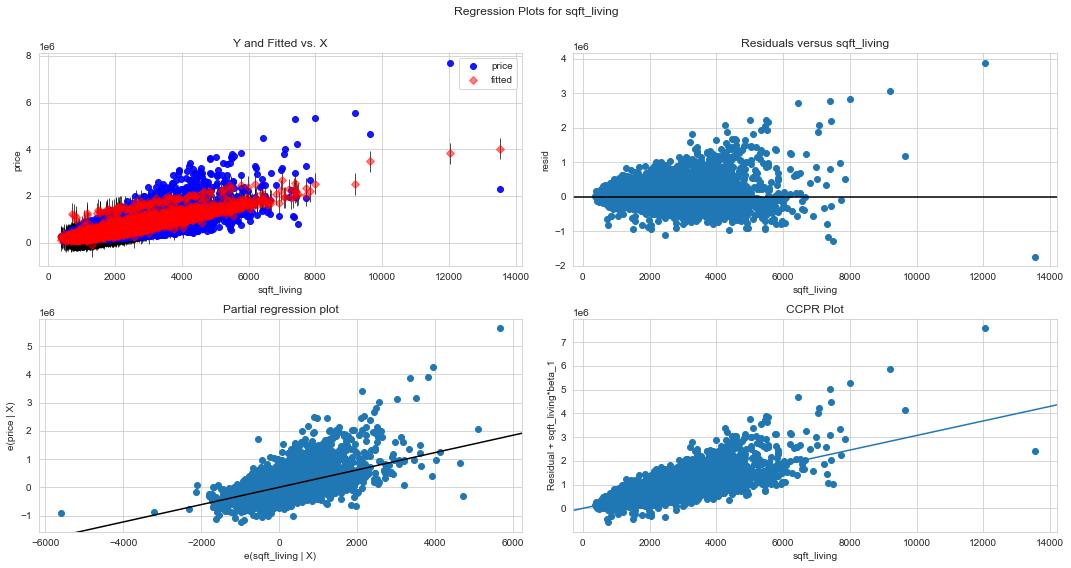

In [84]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(lmodel, 'sqft_living', fig=fig)
plt.show()

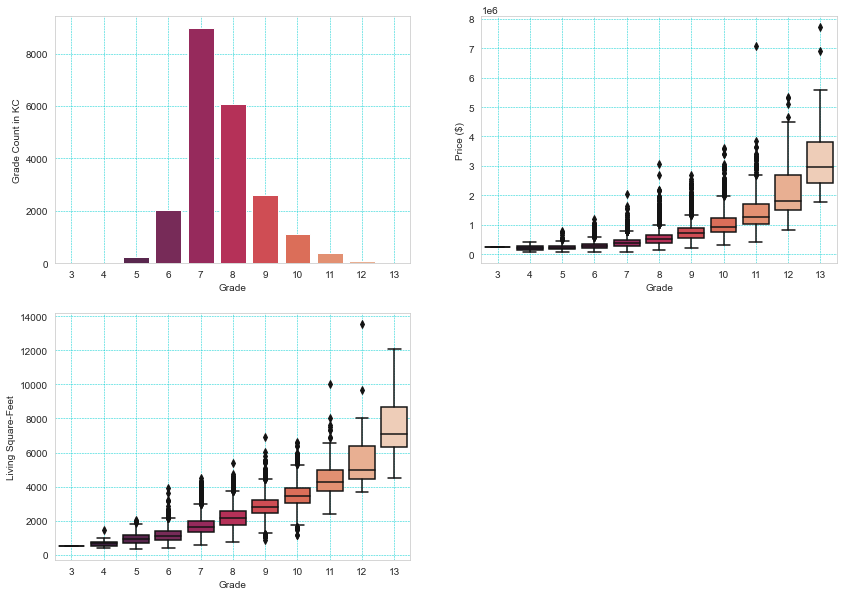

In [85]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
x = df.grade_val
y1 =df.sqft_living
y2 = df.price

sns.countplot(ax=axes[0,0],x=x, palette="rocket", color="k")
#axes[0,0].set_title('Grade Count of KC Housing Set')
axes[0,0].set_xlabel('Grade')
axes[0,0].set_ylabel('Grade Count in KC')
axes[0,0].grid(True, color = 'DarkTurquoise', alpha=1, linestyle = '--', linewidth = 0.5)

sns.boxplot(ax=axes[0,1],x=x, y=y2, palette="rocket", color="k")
#axes[0,1].set_title('Price vs Grade')
axes[0,1].set_xlabel('Grade')
axes[0,1].set_ylabel('Price ($)')
axes[0,1].grid(True, color = 'DarkTurquoise', alpha=1, linestyle = '--', linewidth = 0.5)

sns.boxplot(ax=axes[1,0],x=x, y=y1, palette="rocket", color="k")
#axes[1,0].set_title('Grade vs. Living Square Footage')
axes[1,0].set_xlabel('Grade')
axes[1,0].set_ylabel('Living Square-Feet')
axes[1,0].grid(True, color = 'DarkTurquoise', alpha=1, linestyle = '--', linewidth = 0.5)
fig.delaxes(axes[1,1])
plt.savefig('./figs/business_recommendation.png')
plt.show()

## Regression Results

Linear Model (R-squared Score):
   * Baseline Model (most correlated feature): Both train and test scores were around 0.50
   * Final Model: Both train and test scores were around 0.60

Log-transformed Model (R-squared Score)
   * Baseline Model (most correlated feature): Both train and test scores were around 0.45
   * Final Model: Both train and test scores were around 0.54
 
Even though R-scores are higher for non-log transformed data, we can see from the qq plots above that linear Regression assumptions are violated and as such we cant rely on that model. Model with Log-tranformation has a much better qq plot distribution making us feel more comfortable about it. Also we see homoscadescity in residuals distributions for log-transformed regression as compared to non-log transformed data

We see that price is most directly related to the living square footage of the house, that is the most important factor in price. But having additional features like waterfront, and bedrooms etc adds value to the house

## Recommendations

We see that living square footage is very strongly correlated to house price, and also that houses which have higher grade quality, meaning the construction standards get sold for higher prices. But looking at the distributions of grade values, we see that most of the houses that get sold are grades 7 and 8. Looking at the distribution of square footage vs grades, we can see that there are many houses in grades 5 and 6 that have same square footage as the houses in grades 7 and 8. 

I would therefore recommend that renovating houses in grades 5 and 6 with similar square footage as grades 7 and 8 would be profitable for real estate firm looking to invest.

## Model with log-transformation of only continuous values 

In [105]:
var_cont_catog=['price_log','sqft_living_log','waterfront','AVERAGE','EXCELLENT','FAIR','GOOD','NONE','UNKNOWN',\
           'Average','Fair','Good','Poor','Very Good','sqft_basement_log','sqft_lot_log']
var_disc     =['bedrooms','floors','yr_sold','age','yr_renovated','zipcode','grade_val']
df_log = preprocessed[var_cont_catog]
df_lin = df[var_disc]
df_final=pd.concat([df_log, df_lin], axis=1)
df_final

,price_log,sqft_living_log,waterfront,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN,Average,...,Very Good,sqft_basement_log,sqft_lot_log,bedrooms,floors,yr_sold,age,yr_renovated,zipcode,grade_val
0,12.309982,7.073270,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.000000,8.639411,3,1.0,2014,59.0,1.0,98178,7
1,13.195614,7.851661,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,5.991465,8.887653,3,2.0,2014,63.0,1991.0,98125,7
2,12.100712,6.646391,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.000000,9.210340,2,1.0,2015,82.0,2.0,98028,6
3,13.311329,7.580700,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,6.813445,8.517193,4,1.0,2014,49.0,1.0,98136,7
4,13.142166,7.426549,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.000000,8.997147,3,1.0,2015,28.0,1.0,98074,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.793859,7.333023,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.000000,7.030857,3,3.0,2014,5.0,1.0,98103,8
21593,12.899220,7.745003,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.000000,8.667852,4,2.0,2015,1.0,1.0,98146,8
21594,12.904459,6.927558,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.000000,7.207860,2,2.0,2014,5.0,1.0,98144,7
21595,12.899220,7.377759,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.000000,7.778211,3,2.0,2015,11.0,1.0,98027,8


In [106]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_log          21597 non-null  float64
 1   sqft_living_log    21597 non-null  float64
 2   waterfront         21597 non-null  float64
 3   AVERAGE            21597 non-null  float64
 4   EXCELLENT          21597 non-null  float64
 5   FAIR               21597 non-null  float64
 6   GOOD               21597 non-null  float64
 7   NONE               21597 non-null  float64
 8   UNKNOWN            21597 non-null  float64
 9   Average            21597 non-null  float64
 10  Fair               21597 non-null  float64
 11  Good               21597 non-null  float64
 12  Poor               21597 non-null  float64
 13  Very Good          21597 non-null  float64
 14  sqft_basement_log  21597 non-null  float64
 15  sqft_lot_log       21597 non-null  float64
 16  bedrooms           215

In [107]:
Xf = df_final.drop(columns='price_log')
yf = df_final['price_log']

Xf_train , Xf_test, yf_train, yf_test = train_test_split(Xf,yf,random_state=42, test_size=0.25)

In [108]:
mix_model = LinearRegression()
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
mix_model = LinearRegression()

mix_model_scores = cross_validate(
    estimator=mix_model,
    X=Xf,
    y=yf,
    return_train_score=True,
    cv=splitter
)

print("Mixed Linear Scores")
print("Train score:     ", mix_model_scores["train_score"].mean())
print("Validation score:", mix_model_scores["test_score"].mean())

Mixed Linear Scores
Train score:      0.6476009987195569
Validation score: 0.6649270199170045


In [109]:
mix_model = LinearRegression()
mix_model.fit(Xf_train, yf_train)

LinearRegression()

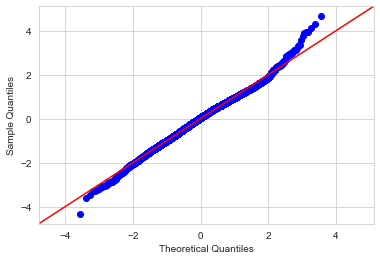

In [110]:
predsf = mix_model.predict(Xf_test)
residualsL = (yf_test - predsf)
sm.graphics.qqplot(residualsL, dist=stats.norm, line='45', fit=True);
#plt.savefig('./figs/qqplot_mix.png')
plt.show()

In [132]:
mixmodel=sm.OLS(yf_train, sm.add_constant(Xf_train)).fit()
mixmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1551.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:55:34   Log-Likelihood:                -3948.0
No. Observations:               16197   AIC:                             7938.
Df Residuals:                   16176   BIC:                             8100.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -55.5229      8.588     -6.466      0.000     -72.355     -38.690
sqft_living_log       0.4554      0.012     36.941      0.000       0.431       0.480
waterfront            0.3914      0.036     10.913      0.000       0.321       0.462
AVERAGE              -9.2754      1.431     -6.481      0.000     -12.080      -6.470
EXCELLENT            -9.1063      1.432     -6.360      0.000     -11.913      -6.300
FAIR                 -9.1866      1.431     -6.418      0.000     -11.992      -6.381
GOOD                 -9.2235      1.431     -6.444      0.000     -12.029      -6.418
NONE                 -9.3604      1.431     -6.543      0.000     -12.165      -6.556
UNKNOWN              -9.3709      1.432     -6.543      0.000     -12.178      -6.564
Average             -11.0718      1.718     -6.445      0.000     -14.439      -7.705
Fair                -11.2067      1.718     -6.522      0.000     -14.575      -7.839
Good                -11.0520      1.717     -6.436      0.000     -14.418      -7.686
Poor                -11.2172      1.718     -6.528      0.000     -14.586      -7.849
Very Good           -10.9750      1.717     -6.392      0.000     -14.341      -7.609
sqft_basement_log     0.0087      0.001      8.917      0.000       0.007       0.011
sqft_lot_log         -0.0355      0.003    -10.409      0.000      -0.042      -0.029
bedrooms             -0.0314      0.004     -8.755      0.000      -0.038      -0.024
floors                0.0915      0.007     13.866      0.000       0.079       0.104
yr_sold               0.0410      0.005      7.876      0.000       0.031       0.051
age                   0.0053      0.000     45.106      0.000       0.005       0.005
yr_renovated       1.643e-05   7.08e-06      2.321      0.020    2.56e-06    3.03e-05
zipcode            1.115e-05   5.25e-05      0.212      0.832   -9.17e-05       0.000
grade_val             0.2369      0.003     69.082      0.000       0.230       0.244
==============================================================================
Omnibus:                       37.750   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.802
Skew:                          -0.028   Prob(JB):                     6.87e-11
Kurtosis:                       3.257   Cond. No.                     1.20e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""